Импорты, функции, обработка данных

Лабораторная 1. Парсер: https://github.com/itmo-ml-lab-ML-course/parser-gr33n-m1ner

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as my_error_func
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

CAR_MAKES = ['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'HUMMER', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'MINI', 'Mitsubishi', 'Nissan', 'Pontiac', 'Porsche', 'Ram', 'Saab', 'Saturn', 'Scion', 'Smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Polestar', 'Rivian', 'Lucid']

def get_car_makes(df):
    makes = []
    for mark in df["Mark"]:
        flag = False
        for name in CAR_MAKES:
            if not flag and mark.find(name) != -1:
                makes.append(name)
                flag = True
                break
        if not flag:
            makes.append("MISSED")
    df["Make"] = makes
    versions = []
    ind = 0
    for version in df["Mark"]:
        versions.append(version.replace(df["Make"][ind] + " ", ""))
        ind += 1
    df["Full name"] = df["Mark"]
    df["Mark"] = versions
    return df

def fix_drive(df):
    ind = 0;
    lst = []
    for value in df["Drive"]:
        value = value.split(", ")
        value = list(set(value))
        value.sort()
        val = ", ".join(value)
        lst.append(val)
        ind += 1
    df["Drive"] = lst
    df.loc[df.Drive.str.contains('4WD'), "Drive"] = "4WD"
    df.loc[df.Drive.str.contains('AWD'), "Drive"] = "AWD"
    return df

# don't use
def lable(df):
    for category in df.select_dtypes(include=['object']).columns:
        encoder = LabelEncoder()
        encoder.fit(df[category])
        df[category] = encoder.transform(df[category])

def show_boxplots(df):
    index = 0
    length = len(df.select_dtypes(include=['int64', 'float64']).columns)
    fig, axes = plt.subplots(nrows=length, figsize=(6, 6*length))
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        df[column].plot(kind='box', ax=axes[index])
        axes[index].set_title('Boxplot for ' + column)
        index += 1
    plt.title('Boxplots for different features')
    plt.show()

def show_distrib(df):
    index = 0
    length = len(df.select_dtypes(include=['int64', 'float64']).columns)
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        df.hist(column=column, bins=15, grid=False, color='#0504aa',
          edgecolor='black', linewidth=1.2)

def one_hot(df):
    encoded_df = pd.get_dummies(df, columns=['Make', 'Drive', 'Max amount of seats', 'Year'])
    return encoded_df

def show_correlation(df):
    corr = df.corr(numeric_only = True)
    return corr

# don't use
def fix_outliners(df):
    for feature in df.select_dtypes(include=['int64']).columns:
        low = df[feature].quantile(0.10)
        high = df[feature].quantile(0.90)
        df = df[(df[feature] >= low) & (df[feature] <= high)]
    return df

def logarithm(df):
    for category in df.select_dtypes(include=['int64']).columns:
        df[category] = np.log(df[category])
    return df

data = pd.read_csv("data.csv")
data = get_car_makes(data)
data = fix_drive(data)
data = one_hot(data)
data = logarithm(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mark                   3000 non-null   object 
 1   Lower bound of price   3000 non-null   float64
 2   Upper bound of price   3000 non-null   float64
 3   Max horsepower         3000 non-null   float64
 4   Full name              3000 non-null   object 
 5   Make_Acura             3000 non-null   uint8  
 6   Make_Alfa Romeo        3000 non-null   uint8  
 7   Make_Audi              3000 non-null   uint8  
 8   Make_BMW               3000 non-null   uint8  
 9   Make_Buick             3000 non-null   uint8  
 10  Make_Cadillac          3000 non-null   uint8  
 11  Make_Chevrolet         3000 non-null   uint8  
 12  Make_Chrysler          3000 non-null   uint8  
 13  Make_Dodge             3000 non-null   uint8  
 14  Make_FIAT              3000 non-null   uint8  
 15  Make

Представление данных:
Боксплоты и гистограммы int64, float64 признаков, таблица корреляций числовых признаков

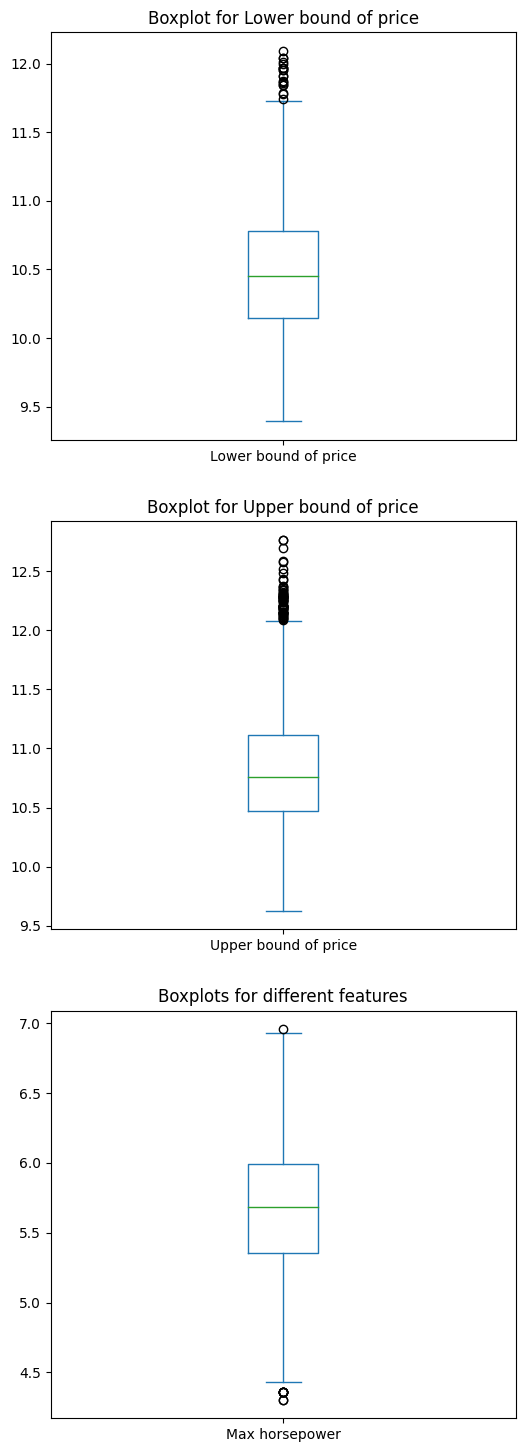

,Lower bound of price,Upper bound of price,Max horsepower,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ford,Make_GMC,Make_Genesis,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Jaguar,Make_Jeep,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lucid,Make_MINI,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Polestar,Make_Porsche,Make_Ram,Make_Rivian,Make_Scion,Make_Smart,Make_Subaru,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Drive_4WD,Drive_AWD,Drive_FWD,Drive_RWD,Max amount of seats_2,Max amount of seats_4,Max amount of seats_5,Max amount of seats_6,Max amount of seats_7,Max amount of seats_8,Max amount of seats_9,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024
Lower bound of price,1.000000,0.910153,0.753449,0.064147,0.057904,0.206510,0.201403,-0.056344,0.097045,-0.117449,-0.023460,-0.056306,-0.101276,-0.110805,-0.031654,0.076290,-0.131202,-0.164405,0.067034,0.114433,-0.066420,-0.154413,0.136525,0.150885,0.070016,0.045671,-0.086461,0.080971,-0.123670,0.229804,-0.141800,-0.118765,0.030689,0.234267,-0.021173,0.063240,-0.091154,-0.034949,-0.130725,0.117118,-0.109395,-0.113804,0.070982,0.032168,0.313504,-0.467846,0.104984,0.180555,0.049390,-0.230775,-0.013308,0.130542,0.078958,0.031422,-0.089500,-0.076502,-0.068683,-0.055008,-0.032683,-0.028847,0.003409,0.014885,0.056664,0.171766,0.084055
Upper bound of price,0.910153,1.000000,0.876129,0.020801,0.051047,0.146417,0.188617,-0.068621,0.084406,-0.081730,-0.028445,-0.000349,-0.103702,-0.063951,0.018499,0.045328,-0.131537,-0.166512,0.032754,0.124621,-0.030298,-0.145320,0.151059,0.066509,0.047378,0.059829,-0.070788,0.094358,-0.118214,0.267671,-0.138727,-0.107969,0.011487,0.296806,0.030192,0.046011,-0.115327,-0.031224,-0.138254,0.110504,-0.146144,-0.094449,0.057852,0.106163,0.291938,-0.506912,0.104692,0.174009,0.092306,-0.270993,0.066032,0.118496,0.074339,0.031213,-0.099659,-0.068652,-0.052745,-0.036815,-0.006733,-0.009902,0.007755,0.033356,0.050724,0.113333,0.053615
Max horsepower,0.753449,0.876129,1.000000,0.000498,0.044266,0.115360,0.190431,-0.077384,0.083104,-0.044022,0.009587,0.119922,-0.111795,0.017499,0.045417,0.075703,-0.147177,-0.155558,0.049928,0.114922,-0.007440,-0.111457,0.088202,0.010960,0.061165,0.065321,-0.063080,0.067926,-0.134335,0.226043,-0.169778,-0.112867,0.039388,0.191124,0.068833,0.094651,-0.099206,-0.048533,-0.131099,0.145349,-0.184996,-0.103661,0.063092,0.123086,0.295569,-0.536827,0.122822,0.116749,0.061446,-0.236597,0.128927,0.106970,0.056543,0.033025,-0.062974,-0.034373,-0.031840,-0.028905,-0.002623,-0.016671,-0.004654,0.024465,0.035965,0.085413,0.024013
Make_Acura,0.064147,0.020801,0.000498,1.000000,-0.013534,-0.034227,-0.035960,-0.019989,-0.022821,-0.036411,-0.015808,-0.019989,-0.012977,-0.034462,-0.021448,-0.017379,-0.029743,-0.030528,-0.022144,-0.019221,-0.023152,-0.031800,-0.021798,-0.034227,-0.020363,-0.003813,-0.016499,-0.007634,-0.021972,-0.032049,-0.017163,-0.036411,-0.006609,-0.024594,-0.009356,-0.006033,-0.009740,-0.002696,-0.025965,-0.014070,-0.043636,-0.025666,-0.022485,-0.063314,0.049589,0.018194,-0.037849,0.037318,-0.030084,-0.007634,-0.026699,0.056955,-0.036969,-0.007634,0.021823,-0.005146,-0.003640,0.009996,0.010374,0.007238,0.007960,-0.012835,-0.009870,-0.018249,-0.005426
Make_Alfa Romeo,0.057904,0.051047,0.044266,-0.013534,1.000000,-0.021251,-0.022327,-0.012411,-0.014169,-0.022607,-0.009815,-0.012411,-0.008058,-0.021397,-0.013317,-0.010791,-0.018467,-0.018954,-0.013749,-0.011934,-0.014375,-0.019744,-0.013534,-0.021251,-0.012643,-0.002368,-0.010244,-0.004740,-0.013642,-0.019899,-0.010656,-0.022607,-0.004104,-0.015270,-0.005809,-0.003746,-0.006048,-0.001674,-0.016121,-0.008736,-0.027093,-0.015936,-0.013960,-0.039311,0.028129,-0.047975,0.083204,0.089506,-0.024434,0.012817,-0.016577,-0.030895,-0.022954,-0.004740,-0.027760,-0.015532,-0.014792,-0.003203,0.009856,0.007816,0.0

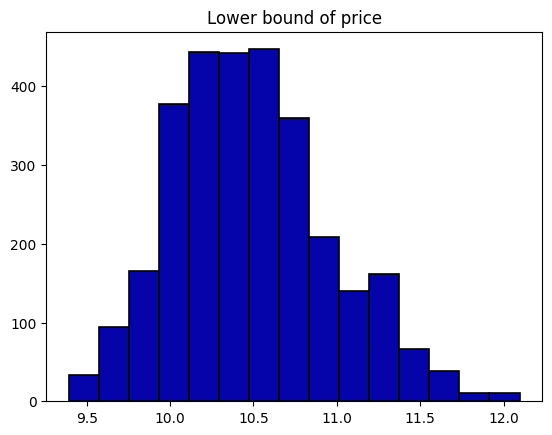

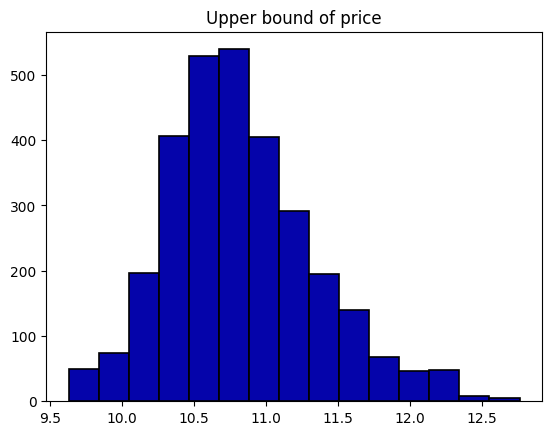

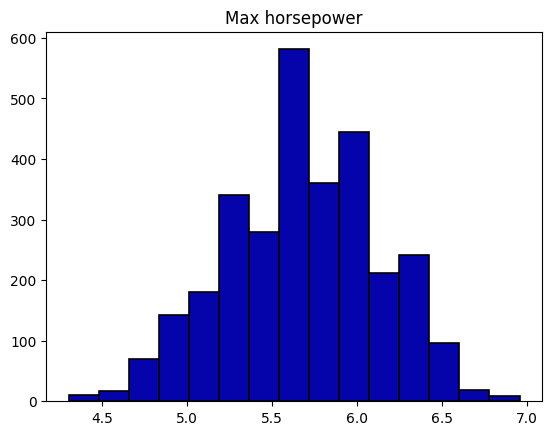

In [ ]:
show_boxplots(data)
show_distrib(data)
corr = show_correlation(data)
corr.style.background_gradient(cmap='coolwarm')

Создание train, valid и test наборов

In [ ]:
scaled_data = data.select_dtypes(include=['int64', 'float64', 'uint8'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = data.select_dtypes(include=['int64', 'float64', 'uint8']).columns

y = scaled_data['Upper bound of price']
X = scaled_data.drop(columns="Upper bound of price", axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/10)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=1/9)
datas = [(x_train, y_train), (x_valid, y_valid), (x_test, y_test)]

In [94]:
def make_prediction(datas, create_predictor, gen_value):
    labels = ["Train", "Valid", "Test"]
    graph_data = [[], [], []]
    min_e = -1
    test_e_ind = -1
    need_k = 1

    for old_k in range(1, 100):
        k = gen_value(old_k)
        model = create_predictor(k)
        model.fit(datas[0][0], datas[0][1])
        for i in range(3):
            result = model.predict(datas[i][0])
            graph_data[i].append((k, my_error_func(datas[i][1], result)))

            if i == 1:
                tmp = my_error_func(datas[i][1], result)
                if (min_e == -1 or tmp < min_e):
                    min_e = tmp
                    test_e_ind = old_k - 1
                    need_k = k


    for i in range(3):
        plt.plot([entry[0] for entry in graph_data[i]], [entry[1] for entry in graph_data[i]])
        plt.title(labels[i])
        plt.show()
    print(need_k, min_e, graph_data[2][test_e_ind][1])

def id_(k):
    return k
def small(k):
    return k / 100
def small_exp(k):
    return (k / 10) ** 2

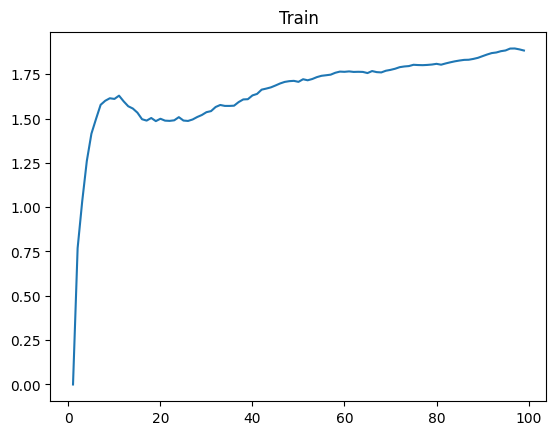

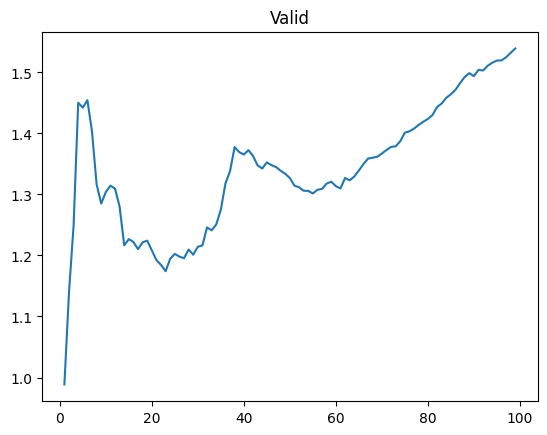

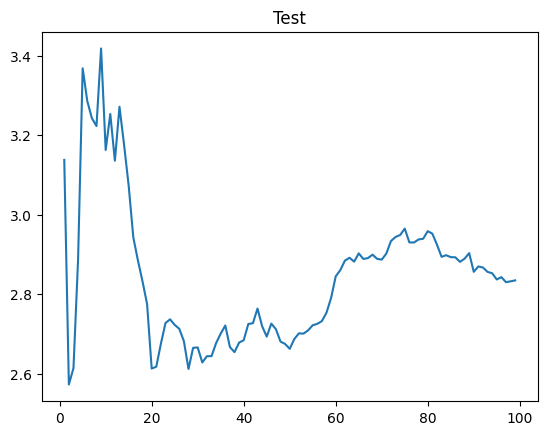

1 0.9885664520577241 3.137516584406309


In [95]:
def create_neighbor(k):
    return KNeighborsRegressor(n_neighbors=k)

make_prediction(datas, create_neighbor, id_)

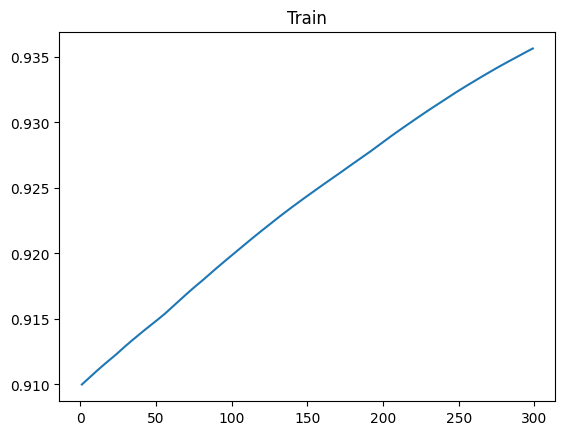

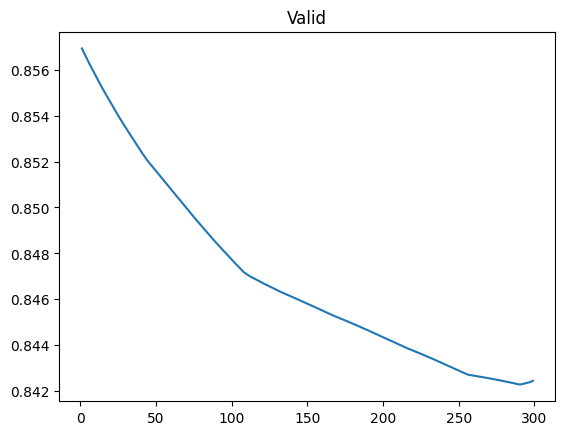

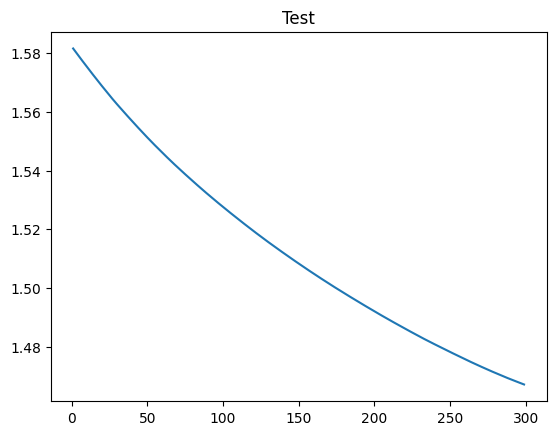

290 0.8422884525867226 1.4689213158833372


In [ ]:
def create_linear(k):
    return Ridge(alpha=k)

make_prediction(datas, create_linear, id_)

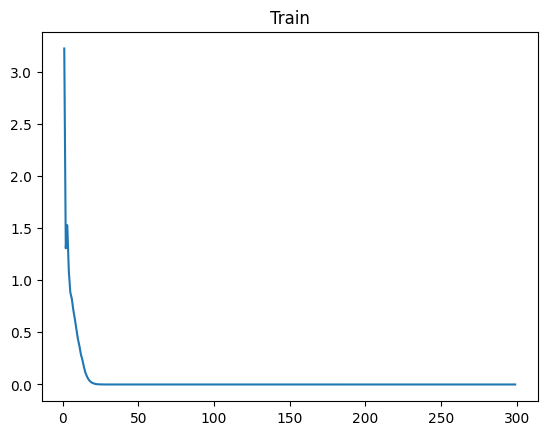

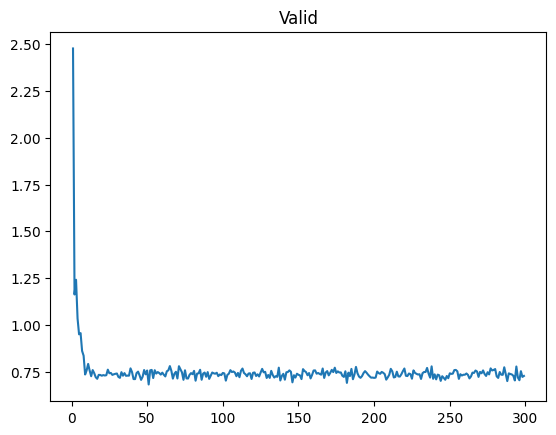

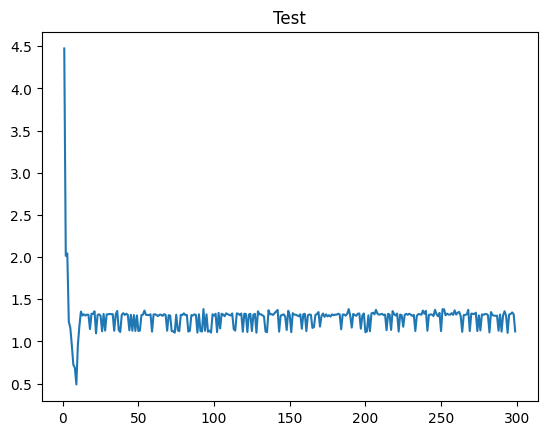

51 0.6810939398498946 1.1303453383648596


In [ ]:
def create_decision_tree(k):
    return DecisionTreeRegressor(max_depth=k)

make_prediction(datas, create_decision_tree, id_)

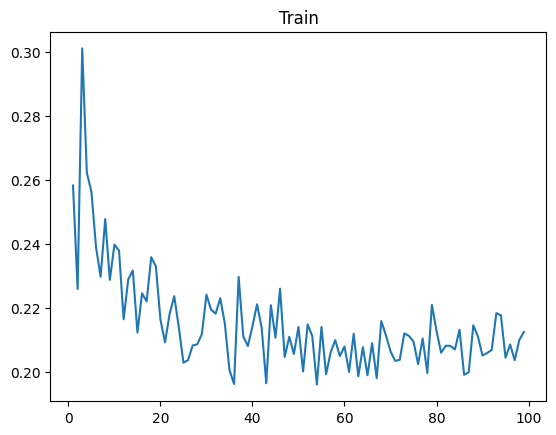

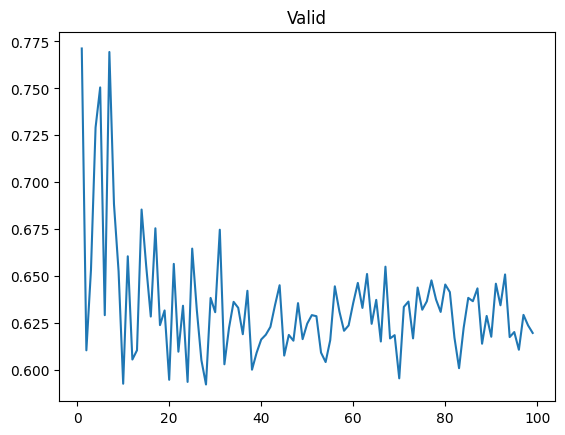

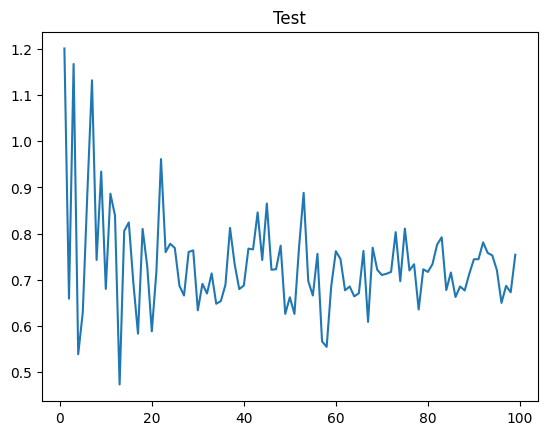

28 0.5922805125712884 0.7599567841940659


In [96]:
def create_ensemble(k):
    return RandomForestRegressor(n_estimators=k)

make_prediction(datas, create_ensemble, id_)